# DBSCAN Clustering

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

In [124]:
# Define possible dataset paths.
paths = [
    '../datasets/_integrated_data/dropped-column-if-missing-value/data.csv',                    # 0
    '../datasets/_integrated_data/dropped-column-if-missing-value/data-gendered.csv',           # 1
    '../datasets/_integrated_data/dropped-row-if-missing-value/data.csv',                       # 2
    '../datasets/_integrated_data/dropped-row-if-missing-value/data-gendered.csv',              # 3
    '../datasets/_integrated_data/missing-pollutant-values-as-NA/data.csv',                     # 4
    '../datasets/_integrated_data/missing-pollutant-values-as-NA/data-gendered.csv',            # 5
    '../datasets/_integrated_data/missing-pollutant-values-as-NaN/data.csv',                    # 6
    '../datasets/_integrated_data/missing-pollutant-values-as-NaN/data-gendered.csv',           # 7
    '../datasets/_integrated_data/missing-pollutant-values-filled-somehow/data.csv',            # 8
    '../datasets/_integrated_data/missing-pollutant-values-filled-somehow/data-gendered.csv'    # 9
]

# Choose a dataset.
chosen_dataset = 1

# Load the data
df = pd.read_csv(paths[chosen_dataset])

# Count of number of pollutant features in the dataset
column_list = ['CO ppm', 'NO pphm', 'NO2 pphm', 'OZONE pphm', 'PM10 µg/m³', 'SO2 pphm']
n_pollutants = sum([1 for col in df.columns if col in column_list])

# Show the dataset
print(f"Dataset shape: {df.shape}")
print(f"Number of pollutant features: {n_pollutants}")
df.describe()

Dataset shape: (130, 17)
Number of pollutant features: 3


,NO pphm,NO2 pphm,OZONE pphm,asthma edp [f],asthma edp [m],asthma hospitalisations [f],asthma hospitalisations [m],copd deaths [f],copd deaths [m],copd hospitalisations [f],copd hospitalisations [m],iap deaths [f],iap deaths [m],iap hospitalisations [f],iap hospitalisations [m]
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.00000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,0.547513,0.585202,1.854216,376.920385,346.448846,128.024462,91.571808,21.920000,30.40500,209.263846,244.075385,7.806154,9.291923,293.408077,364.459615
std,0.671731,0.326022,0.249853,147.322172,121.227754,40.208431,26.676362,7.231492,9.04189,81.773675,86.668726,2.237805,2.616518,82.550957,87.753538
min,0.055302,0.173631,1.279167,119.700000,131.200000,59.725000,33.425000,7.900000,11.00000,56.100000,65.500000,3.900000,4.200000,135.000000,182.500000
25%,0.190634,0.327954,1.711455,253.850000,248.975000,101.352083,74.193750,15.575000,24.08750,146.816667,178.100000,6.312500,7.400000,239.987500,309.650000
50%,0.342790,0.506030,1.861842,378.625000,332.100000,121.325000,89.100000,23.512500,31.73750,215.400000,248.050000,7.762500,9.000000,296.800000,366.950000
75%,0.632921,0.767641,2.019923,464.900000,424.575000,149.337500,103.487500,27.050000,35.37500,261.075000,289.300000,8.900000,11.112500,342.000000,408.975000
max,3.079731,1.569617,2.411666,761.700000,729.600000,255.575000,183.250000,46.400000,57.40000,413.600000,482.233333,14.900000,16.700000,498.700000,599.500000


In [125]:
# Define the scaler
scaler = StandardScaler()

# Extract features and scale them
df = df.drop(columns=['financial year', 'lhd'])
x_features = df.iloc[:, :n_pollutants]
y_features = df.iloc[:, n_pollutants:]
x_scaled = scaler.fit_transform(x_features)
y_scaled = scaler.fit_transform(y_features)

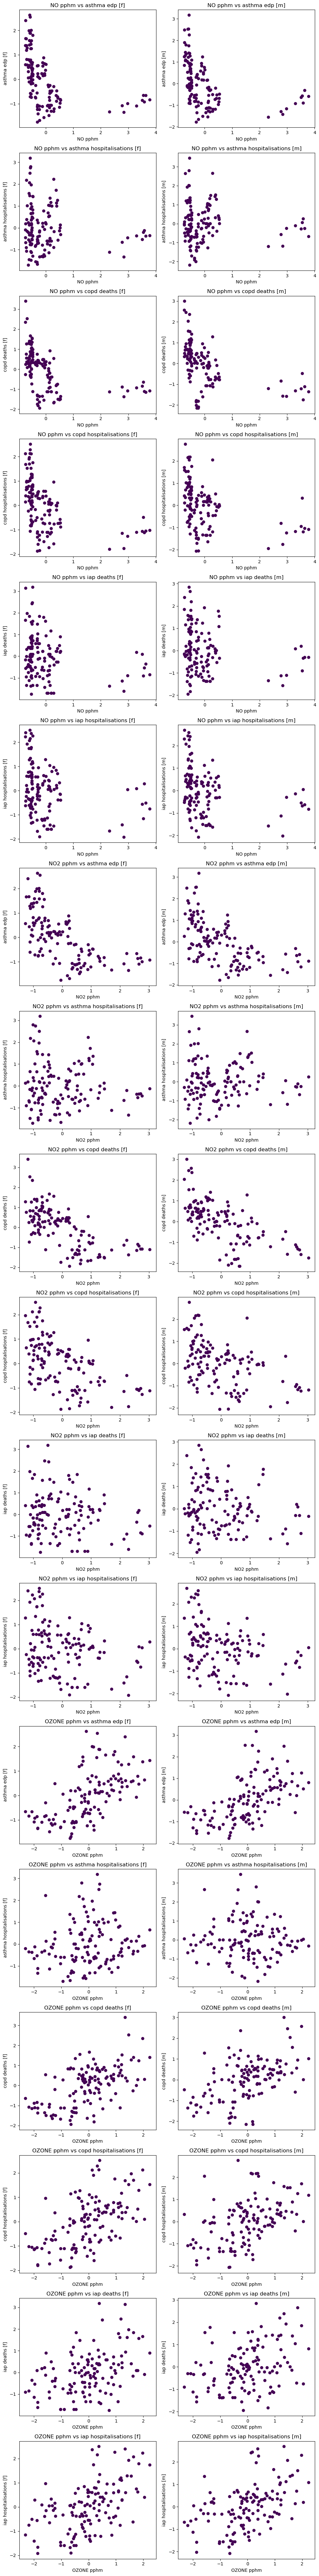

In [126]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np

# Combine x_scaled and y_scaled for clustering
combined_scaled = np.hstack((x_scaled, y_scaled))

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(combined_scaled)

# Get the labels
labels = dbscan.labels_

# Define the subplot dimensions
n_x = x_scaled.shape[1]
n_y = y_scaled.shape[1]
cols = 2
rows = int(np.ceil(n_x * n_y / cols))
fig, axes = plt.subplots(rows, cols, figsize=(10, 80))

# Flatten axes for easier indexing
axes = axes.flatten()

# Set different colors for different clusters
colors = labels
colors[colors == -1] = 0
colors = colors + 1

# Plot the clusters
plot_index = 0
for i in range(n_x):
    for j in range(n_y):
        if plot_index < len(axes):
            ax = axes[plot_index]
            ax.scatter(x_scaled[:, i], y_scaled[:, j], c=labels, cmap='viridis', marker='o')
            ax.set_title(f"{x_features.columns[i]} vs {y_features.columns[j]}")
            ax.set_xlabel(x_features.columns[i])
            ax.set_ylabel(y_features.columns[j])
            plot_index += 1

# Hide any unused subplots
for k in range(plot_index, len(axes)):
    fig.delaxes(axes[k])

plt.tight_layout()
plt.show()
